In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('./附件1-装箱数据.xlsx',sheet_name=None)

pakage_data = data['耗材数据']
express_data = data['订单数据']
data_count = data['count']


In [23]:
pakage_data.info()
express_data.info()
data_count.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   耗材名称        9 non-null      object 
 1   耗材类型        9 non-null      object 
 2   长           9 non-null      int64  
 3   宽           9 non-null      int64  
 4   高           9 non-null      int64  
 5   重量          9 non-null      int64  
 6   Unnamed: 6  4 non-null      float64
dtypes: float64(1), int64(4), object(2)
memory usage: 632.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   case（订单）  10000 non-null  int64
 1   l（长）      10000 non-null  int64
 2   w（宽）      10000 non-null  int64
 3   h（高）      10000 non-null  int64
 4   num（数量）   10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


,case,num
0,1,8
1,2,7
2,3,6
3,4,1
4,5,3


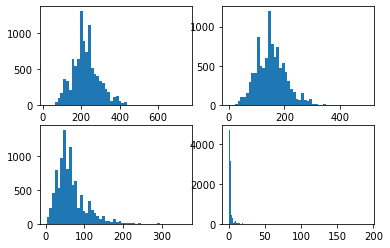

In [24]:
# 对数据进行分析
ax1 = plt.subplot(2,2,1)
ax1.hist(express_data['l（长）'], bins=50)
ax1 = plt.subplot(2,2,2)
ax1.hist(express_data['w（宽）'], bins=50)
ax1 = plt.subplot(2,2,3)
ax1.hist(express_data['h（高）'], bins=50)
ax1 = plt.subplot(2,2,4)
ax1.hist(express_data['num（数量）'], bins=200)
plt.savefig('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/11/imgs/hist.png')
plt.show()

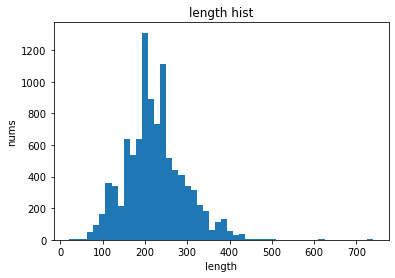

In [25]:
plt.hist(express_data['l（长）'], bins=50)

plt.title("length hist")
plt.xlabel("length")
plt.ylabel("nums")
plt.savefig('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/11/imgs/length hist.png')
plt.show()

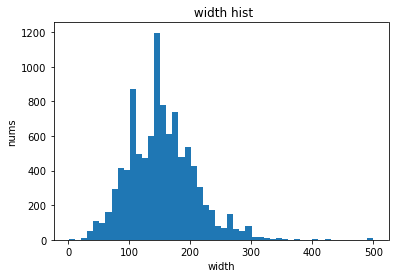

In [26]:
plt.hist(express_data['w（宽）'], bins=50)

plt.title(" width hist")
plt.xlabel("width")
plt.ylabel("nums")
plt.savefig('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/11/imgs/width hist.png')
plt.show()

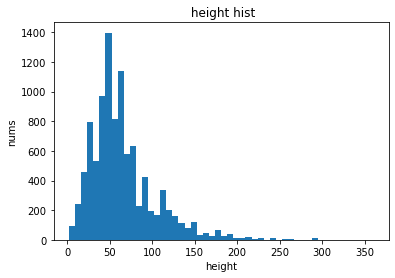

In [27]:
plt.hist(express_data['h（高）'], bins=50)

plt.title(" height hist")
plt.xlabel("height")
plt.ylabel("nums")
plt.savefig('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/11/imgs/height hist.png')
plt.show()

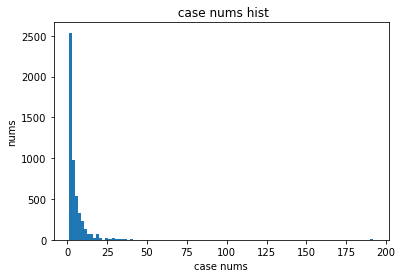

In [28]:
#对订单数进行分析
plt.hist(data_count['num'],bins=100)
plt.title(" case nums hist")
plt.xlabel("case nums")
plt.ylabel("nums")
plt.savefig('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/11/imgs/case nums hist.png')
plt.show()

In [29]:
#对数据进行分类，先计算只包含一个快递件对case情况
#将一个包裹的情况的case提取
ca_case1 = []

ca_case_more = []

ca_1 = []
ca_more = []
#将数据转化为list
data_count_list = data_count.values.tolist()
express_data_list = express_data.values.tolist()


for i in range(len(data_count_list)):
    if data_count_list[i][1]==1:
        ca_case1.append(i+1)
    else:
        ca_case_more.append(i+1)
for i in range(len(express_data_list)):
    if express_data_list[i][0] in ca_case1:
        ca_1.append(express_data_list[i])
    else:
        ca_more.append(express_data_list[i])
print(len(ca_1))
# print(len(ca_2))
# print(len(ca_3))
# print(len(ca_more))
# print(len(ca_case1))
# print(len(ca_case_more))

1402


In [30]:
#计算出纸袋体积，与物体比较，然后算出体积大于的纸箱
Box_size = [
    [165,120,55],
    [200,140,70],
    [200,150,150],
    [270,200,90],
    [300,200,170]
]

Box_volume =[1089000,1960000,4500000,4860000,10200000]

Bag_size = [
    [179.3421433,119.3421433,71.6578567],
    [210.1253636,150.1253636,90.87463639],
    [280.662174,220.662174,120.337826],
    [305.9244646,245.9244646,145.0755354]
]
Bag_volume = [1533698.536,2866653.729,7452705.136,10914657.83]


In [31]:
#计算一个物品下的装箱问题
#计算单个物品的体积

#
def check_volume(good,box):
    flag = False
    if (good[0]<box[0] and good[1]<box[1] and good[2]<box[2]) or (good[0]<box[0] and good[2]<box[1] and good[1]<box[2]) or(good[2]<box[0] and good[1]<box[1] and good[0]<box[2]) or (good[2]<box[0] and good[0]<box[1] and good[1]<box[2]) or (good[1]<box[0] and good[0]<box[1] and good[2]<box[2]) or (good[1]<box[0] and good[2]<box[1] and good[0]<box[2]):
        flag = True
    return flag


object_volume = []
for i in range(len(ca_1)):
    object_volume.append(ca_1[i][1]*ca_1[i][2]*ca_1[i][3])

#从大于物品体积的第一个箱子开始计算，能否装下，并抛出序号
fit_num = []
for i in range(len(ca_1)):
    j = 0
    flag1 = False
    while j < 5:
        if check_volume(ca_1[i][1:4],Box_size[j]):
            fit_num.append(j+1)
            flag1 = True
            break
        else:
            j = j+1
    if not flag1:
        fit_num.append(-1)

print(fit_num.count(-1))
print(len(fit_num))




494
1402


In [32]:
#对初始数据记性能否填装对检验，对无法填装对数据删除
# 包换所有信息的数据list 'express_data_list'
# 记录需要删除的行
delete_index = []
for i in range(len(express_data_list)):
    if not check_volume(express_data_list[i][1:4],Box_size[4]):
        delete_index.append(i)

clean_data = express_data_list.copy()
# print(len(express_data_list))
#生成清洗后的总数据集
for i in range(len(delete_index)):
    clean_data.pop(delete_index[len(delete_index)-i-1])
print(len(clean_data))
# for i in range(len(clean_data)):
#     flag1 = True
#     if not check_volume(clean_data[i][1:4],Box_size[4]):
#         flag1 = False
# print(flag1)


7657


In [33]:
#对清洗后对数据再次进行划分，分成一个订单单一包裹和多个包裹对情况分析
list_head = [x[0] for x in clean_data ]
listset = set(list_head)
list_number = len(listset)

clean_data_one = []
clean_data_more = []
for i in listset:
    if list_head.count(i) == 1:
        if clean_data[list_head.index(i)][4] == 1:
            clean_data_one.append(clean_data[list_head.index(i)])
        else:
            clean_data_more.append(clean_data[list_head.index(i)])
    else:
        for j in range(len(list_head)):
            if list_head[j] == i:
                clean_data_more.append(clean_data[j])
print(len(clean_data_one))
print(len(clean_data_more))
print(len(clean_data))


1071
6586
7657


In [34]:
#对清洗完成的一包裹数据集进行包裹选择运算

fit_num_one = []
for i in range(len(clean_data_one)):
    j = 0
    flag1 = False
    while j < 5:
        if check_volume(clean_data_one[i][1:4],Box_size[j]):
            fit_num_one.append(j+1)
            flag1 = True
            break
        else:
            j = j+1
    if not flag1:
        fit_num_one.append(-1)

print(fit_num_one)


[1, 5, 1, 4, 4, 1, 4, 1, 3, 4, 1, 2, 4, 4, 4, 2, 4, 4, 5, 3, 3, 4, 5, 4, 4, 4, 3, 5, 5, 3, 4, 5, 4, 4, 3, 4, 4, 5, 4, 4, 4, 3, 5, 4, 4, 5, 4, 5, 3, 2, 4, 1, 4, 4, 4, 3, 5, 3, 3, 5, 3, 5, 3, 3, 1, 5, 3, 5, 4, 3, 1, 5, 2, 4, 3, 4, 5, 2, 4, 3, 3, 1, 5, 5, 4, 5, 3, 5, 3, 3, 1, 4, 2, 5, 5, 2, 4, 3, 3, 4, 4, 4, 4, 5, 4, 1, 3, 1, 4, 3, 4, 2, 2, 2, 4, 5, 4, 3, 4, 3, 5, 4, 4, 5, 5, 3, 3, 4, 4, 4, 5, 4, 5, 4, 4, 3, 5, 3, 5, 4, 5, 4, 4, 4, 4, 3, 5, 4, 4, 5, 3, 3, 4, 5, 4, 3, 4, 5, 4, 5, 2, 4, 2, 5, 3, 3, 5, 3, 4, 4, 3, 5, 4, 2, 4, 1, 5, 3, 4, 4, 4, 3, 1, 5, 4, 3, 3, 5, 4, 5, 4, 5, 5, 5, 4, 4, 5, 4, 4, 2, 3, 5, 4, 4, 4, 4, 2, 1, 3, 4, 3, 4, 4, 4, 4, 5, 5, 4, 3, 5, 2, 5, 3, 2, 4, 5, 2, 5, 3, 3, 3, 5, 3, 1, 1, 5, 4, 4, 4, 5, 2, 4, 4, 5, 5, 1, 5, 3, 4, 2, 5, 4, 5, 4, 4, 5, 2, 3, 5, 4, 4, 4, 3, 4, 4, 5, 5, 4, 5, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 2, 4, 4, 4, 4, 5, 4, 3, 5, 2, 1, 4, 5, 4, 2, 4, 5, 4, 5, 4, 3, 2, 4, 4, 5, 3, 4, 1, 4, 2, 1, 3, 5, 3, 2, 4, 3, 4, 5, 4, 4, 4, 5, 4, 4, 4, 3, 5, 3, 4, 5, 4, 3, 4, 

In [35]:
# 针对第二种袋子问题
# 重新进行清

def check_Bag_volume(good, bag):
    flag = False
    if ((bag[0]+1>=good[0]+good[1]) and (bag[1]+1)>=good[0]+good[2])or((bag[0]+1>=good[0]+good[2]) and (bag[1]+1)>=good[0]+good[1]) or((bag[0]+1>=good[1]+good[0]) and (bag[1]+1)>=good[1]+good[2]) or((bag[0]+1>=good[2]+good[0]) and (bag[1]+1)>=good[2]+good[1]) or((bag[0]+1>=good[2]+good[1]) and (bag[1]+1)>=good[2]+good[0]):
        flag = True
    return flag
delete_index1 = []
for i in range(len(express_data_list)):
    if not check_Bag_volume(express_data_list[i][1:4],Bag_size[3]):
        delete_index1.append(i)
print(len(express_data_list))
print(len(delete_index1))
clean_Bag = express_data_list.copy()
for i in range(len(delete_index1)):
    clean_Bag.pop(delete_index1[len(delete_index1)-i-1])
# print(delete_index1)
# print(len(express_data_list))
# print(len(clean_Bag))
# print(express_data_list[delete_index[0]])

10000
3849


In [36]:
#对清洗完的数据进行划分
"""
list_head = [x[0] for x in clean_data ]
listset = set(list_head)
list_number = len(listset)

clean_data_one = []
clean_data_more = []
for i in listset:
    if list_head.count(i) == 1:
        if clean_data[list_head.index(i)][4] == 1:
            clean_data_one.append(clean_data[list_head.index(i)])
        else:
            clean_data_more.append(clean_data[list_head.index(i)])
    else:
        for j in range(len(list_head)):
            if list_head[j] == i:
                clean_data_more.append(clean_data[j])
"""
list_head_bag = [y[0] for y in clean_Bag]
listset_bag = set(list_head_bag)

clean_bag_one = []
clean_bag_more = []
for i in listset_bag:
    if list_head_bag.count(i) == 1:
        if clean_Bag[list_head_bag.index(i)][4] == 1:
            clean_bag_one.append(clean_Bag[list_head_bag.index(i)])
        else:
            clean_bag_more.append(clean_Bag[list_head_bag.index(i)])
    else:
        for j in range(len(list_head_bag)):
            if list_head_bag[j] == i:
                clean_bag_more.append(clean_Bag[j])


fit_bag_one = []
for i in range(len(clean_bag_one)):
    j = 0
    while j < 4:
        if check_Bag_volume(clean_bag_one[i][1:4],Bag_size[j]):
            fit_bag_one.append(j+1)
            break
        else:
            j = j+1

print(len(fit_bag_one))
print(len(clean_bag_more))
print(fit_bag_one)

876
5275
[1, 2, 3, 3, 3, 2, 3, 3, 1, 2, 4, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 2, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 1, 4, 4, 3, 1, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 2, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 1, 3, 1, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 4, 1, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 1, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 4, 4, 2, 3, 4, 2, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 3, 2, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 2, 1, 3, 1, 3, 2, 3, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 1, 3, 2, 2, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 2, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 1, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 3, 2, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 

In [37]:
#混合情况下，对于单一一个包裹的问题应该采取比较策略，来选择最后选用bag or box or none
print(len(fit_num))
#从大于物品体积的第一个袋子开始计算，能否装下，并抛出序号
fit_num_bag = []
#对两种类型都无法装载的情况
count_carry = 0
for i in range(len(ca_1)):
    j = 0
    flag1 = False
    while j < 4:
        if check_Bag_volume(ca_1[i][1:4],Bag_size[j]):
            fit_num_bag.append(j+1)
            flag1 = True
            break
        else:
            j = j+1
    if not flag1:
        fit_num_bag.append(-1)
print(fit_num_bag)
print(fit_num_bag.count(-1))
print(fit_num.count(-1))
# 针对两个数组历遍结果保存在新数组
fix_result = []
for i in range(len(fit_num_bag)):
    if(fit_num[i]<0 and fit_num_bag[i]<0):
        fix_result.append( [None,-1])
        count_carry = count_carry+1
    elif(fit_num[i]<0):
        fix_result.append(['Bag',fit_num_bag[i]])
    elif(fit_num_bag[i]<0):
        fix_result.append( ['Box',fit_num[i]])
    else:
        if Box_volume[fit_num[i]-1]>=Bag_volume[fit_num_bag[i]-1]:
            fix_result.append(['Bag', fit_num_bag[i]])
        else:
            fix_result.append( ['Box', fit_num[i]])
print(fit_num.count(-1))
print(fit_num_bag.count(-1))
print(count_carry)


1402
[1, 3, -1, 3, -1, 2, -1, -1, -1, 1, 2, 4, 4, -1, 2, 3, -1, 3, -1, 3, -1, -1, -1, 3, 3, 3, 3, -1, -1, 3, -1, -1, 4, -1, -1, -1, 3, -1, -1, 3, -1, -1, -1, -1, -1, -1, 3, 4, 3, -1, -1, -1, -1, 4, 3, -1, -1, 4, 2, -1, 3, 3, -1, 3, 3, -1, -1, -1, -1, -1, 3, 3, 1, 4, -1, 3, -1, 1, -1, 3, 3, 3, 4, -1, -1, -1, 2, -1, 3, -1, -1, 3, 3, -1, -1, -1, -1, -1, -1, 4, -1, -1, 3, -1, -1, 3, -1, 4, 3, 3, 4, -1, 3, 3, 3, 3, 3, 3, -1, 4, -1, -1, 1, 3, 1, 3, 3, 4, 3, 3, 3, -1, 3, -1, -1, -1, -1, 4, 3, -1, 3, 4, -1, -1, -1, 3, -1, 4, -1, 4, -1, -1, 3, -1, -1, 4, 3, -1, -1, -1, -1, -1, -1, -1, 3, -1, -1, 3, -1, -1, -1, 3, -1, -1, -1, -1, 3, 3, 3, -1, 3, -1, -1, -1, 4, 3, 3, 3, -1, 3, 3, 3, -1, -1, -1, 4, -1, 4, -1, 1, 4, -1, 3, -1, -1, 3, 3, -1, -1, 3, 3, 3, -1, -1, -1, -1, -1, 3, -1, -1, -1, 3, 4, -1, -1, -1, 1, 3, -1, 3, -1, -1, 3, 3, -1, 2, 3, 3, 3, 4, -1, -1, 4, 3, -1, -1, 4, 4, -1, -1, -1, 3, -1, -1, -1, 3, 2, 3, -1, 3, -1, -1, -1, 3, -1, 3, 3, -1, -1, 3, 1, 3, -1, -1, -1, -1, -1, -1, 2, -1, -1, 3,

In [38]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 5/12/23 10:26 AM
# @Author  : charles_shen
# @File    : main.py
# @Software: PyCharm
# (x, y, z) --> (length, width, height)
# length in x-axis; width in y-axis; height in z-axis
from decimal import Decimal
DEFAULT_NUMBER_OF_DECIMALS = 3
START_POSITION = [0, 0, 0]
def get_limit_number_of_decimals(number_of_decimals):
    return Decimal('1.{}'.format('0' * number_of_decimals))

def set_to_decimal(value, number_of_decimals):
    number_of_decimals = get_limit_number_of_decimals(number_of_decimals)

    return Decimal(value).quantize(number_of_decimals)


def rect_intersect(item1, item2, x, y):
    """Estimate whether two items get intersection in one dimension.
    Args:
        item1, item2: any two items in item list.
        x,y: Axis.LENGTH/ Axis.Height/ Axis.WIDTH.
    Returns:
        Boolean variable: False when two items get intersection in one dimension; True when two items do not intersect in one dimension.
    """

    d1 = item1.get_dimension()
    d2 = item2.get_dimension()

    cx1 = item1.position[x] + d1[x] / 2
    cy1 = item1.position[y] + d1[y] / 2
    cx2 = item2.position[x] + d2[x] / 2
    cy2 = item2.position[y] + d2[y] / 2

    ix = max(cx1, cx2) - min(cx1, cx2)  # ix: |cx1-cx2|
    iy = max(cy1, cy2) - min(cy1, cy2)  # iy: |cy1-cy2|

    return ix < (d1[x] + d2[x]) / 2 and iy < (d1[y] + d2[y]) / 2


def rect_intersect(item1, item2, x, y):
    """Estimate whether two items get intersection in one dimension.
    Args:
        item1, item2: any two items in item list.
        x,y: Axis.LENGTH/ Axis.Height/ Axis.WIDTH.
    Returns:
        Boolean variable: False when two items get intersection in one dimension; True when two items do not intersect in one dimension.
    """

    d1 = item1.get_dimension()
    d2 = item2.get_dimension()

    cx1 = item1.position[x] + d1[x] / 2
    cy1 = item1.position[y] + d1[y] / 2
    cx2 = item2.position[x] + d2[x] / 2
    cy2 = item2.position[y] + d2[y] / 2

    ix = max(cx1, cx2) - min(cx1, cx2)  # ix: |cx1-cx2|
    iy = max(cy1, cy2) - min(cy1, cy2)  # iy: |cy1-cy2|

    return ix < (d1[x] + d2[x]) / 2 and iy < (d1[y] + d2[y]) / 2


def stack(item1, item2):
    """Stack two items with same length, width, height or any two of three sides are same.
    Args:
        item1, item2: any two items in item list.
    Return:
        item1/ stacked_item_list/ stacked_item.
    """

    if (
            item1.length == item2.length and
            item1.width == item2.width and
            item1.height == item2.height
    ):
        stacked_item_1 = Item(item1.name + item2.name, item1.length + item2.length,
                              item1.width, item1.height, item1.weight + item2.weight)  # (2l, w, h)
        stacked_item_2 = Item(item1.name + item2.name, item1.length, item1.width + item2.width,
                              item1.height, item1.weight + item2.weight)  # (l, 2w, h)
        stacked_item_3 = Item(item1.name + item2.name, item1.length, item1.width,
                              item1.height + item2.height, item1.weight + item2.weight)  # (l, w, 2h)

        stacked_item_list = [stacked_item_1, stacked_item_2, stacked_item_3]

        return stacked_item_list

    elif (
            item1.length == item2.length and
            item1.width == item2.width and
            item1.height != item2.height
    ):
        stacked_item = Item(item1.name + item2.name, item1.length, item1.width,
                            item1.height + item2.height, item1.weight + item2.weight)  # (l, w, 2h)

        return stacked_item

    elif (
            item1.length == item2.length and
            item1.height == item2.height and
            item1.width != item2.width
    ):
        stacked_item = Item(item1.name + item2.name, item1.length, item1.width + item2.width,
                            item1.height, item1.weight + item2.weight)  # (l, 2w, h)

        return stacked_item

    elif (
            item1.width == item2.width and
            item1.height == item2.height and
            item1.length != item2.length
    ):
        stacked_item = Item(item1.name + item2.name, item1.length + item2.length,
                            item1.width, item1.height, item1.weight + item2.weight)

        return stacked_item  # (2l, w, h)

    else:
        return item1


def intersect(item1, item2):
    """Estimate whether two items get intersection in 3D dimension.
    Args:
        item1, item2: any two items in item list.
    Returns:
        Boolean variable: False when two items get intersection; True when two items do not intersect.
    """

    return (
            rect_intersect(item1, item2, Axis.LENGTH, Axis.HEIGHT) and  # xz dimension
            rect_intersect(item1, item2, Axis.HEIGHT, Axis.WIDTH) and  # yz dimension
            rect_intersect(item1, item2, Axis.LENGTH, Axis.WIDTH))  # xy dimension

class RotationType:
    RT_LWH = 0
    RT_HLW = 1
    RT_HWL = 2
    RT_WHL = 3
    RT_WLH = 4
    RT_LHW = 5

    ALL = [RT_LWH, RT_HLW, RT_HWL, RT_WHL, RT_WLH, RT_LHW]

class Axis:
    LENGTH = 0
    WIDTH = 1
    HEIGHT = 2

    ALL = [LENGTH, WIDTH, HEIGHT]

class Item:
    def __init__(self, name, length, width, height, weight):
        self.name = name
        self.length = length
        self.width = width
        self.height = height
        self.weight = weight
        self.rotation_type = 0  # initial rotation type: (x, y, z) --> (l, w, h)
        self.position = START_POSITION  # initial position: (0, 0, 0)
        self.number_of_decimals = DEFAULT_NUMBER_OF_DECIMALS

    def format_numbers(self, number_of_decimals):
        self.length = set_to_decimal(self.length, number_of_decimals)
        self.height = set_to_decimal(self.height, number_of_decimals)
        self.width = set_to_decimal(self.width, number_of_decimals)
        self.weight = set_to_decimal(self.weight, number_of_decimals)
        self.number_of_decimals = number_of_decimals

    def get_volume(self):
        return set_to_decimal(
            self.length * self.height * self.width, self.number_of_decimals)

    def get_dimension(self):  # 6 orientation types -- (x-axis, y-axis, z-axis)
        if self.rotation_type == RotationType.RT_LWH:
            dimension = [self.length, self.width, self.height]
        elif self.rotation_type == RotationType.RT_HLW:
            dimension = [self.height, self.length, self.width]
        elif self.rotation_type == RotationType.RT_HWL:
            dimension = [self.height, self.width, self.length]
        elif self.rotation_type == RotationType.RT_WHL:
            dimension = [self.width, self.height, self.length]
        elif self.rotation_type == RotationType.RT_WLH:
            dimension = [self.width, self.length, self.height]
        elif self.rotation_type == RotationType.RT_LHW:
            dimension = [self.length, self.height, self.width]
        else:
            dimension = []

        return dimension

    def string(self):
        return "%s(%sx%sx%s, weight: %s) pos(%s) rt(%s) vol(%s)" % (
            self.name, self.length, self.width, self.height, self.weight,
            self.position, self.rotation_type, self.get_volume()
        )
    def print_list(self):
        return [self.name, self.length, self.width, self.height, 0]

class Packer:
    def __init__(self):
        self.bins = []
        self.unplaced_items = []
        self.placed_items = []
        self.unfit_items = []
        self.total_items = 0
        self.total_used_bins = 0  # not used yet
        self.used_bins = []  # not used yet

    def add_bin(self, bin):
        return self.bins.append(bin)

    def add_item(self, item):
        """Add unplaced items into bin's unplaced_items list.
        Args:
            item: an unplaced item.
        Returns:
            The unplaced item is added into bin's unplaced_items list."""

        self.total_items += 1
        return self.unplaced_items.append(item)

    def pivot_dict(self, bin, item):
        """For each item to be placed into a certain bin, obtain a corresponding comparison parameter of each optional pivot that the item can be placed.
        Args:
            bin: a bin in bin list that a certain item will be placed into.
            item: an unplaced item in item list.
        Returns:
            a pivot_dict contain all optional pivot point and their comparison parameter of the item.
            a empty dict may be returned if the item couldn't be placed into the bin.
        """

        pivot_dict = {}
        can_put = False

        for axis in range(0, 3):
            items_in_bin = bin.items
            items_in_bin_temp = items_in_bin[:]

            n = 0
            while n < len(items_in_bin):
                pivot = [0, 0, 0]

                if axis == Axis.LENGTH:  # axis = 0/ x-axis
                    ib = items_in_bin[n]
                    pivot = [ib.position[0] + ib.get_dimension()[0],
                             ib.position[1],
                             ib.position[2]]
                    try_put_item = bin.can_hold_item_with_rotation(item, pivot)

                    if try_put_item:
                        can_put = True
                        q = 0
                        q = 0
                        ib_neigh_x_axis = []
                        ib_neigh_y_axis = []
                        ib_neigh_z_axis = []
                        right_neighbor = False
                        front_neighbor = False
                        above_neighbor = False

                        while q < len(items_in_bin_temp):
                            if items_in_bin_temp[q] == items_in_bin[n]:
                                q += 1

                            else:
                                ib_neighbor = items_in_bin_temp[q]

                                if (
                                        ib_neighbor.position[0] > ib.position[0] + ib.get_dimension()[0] and
                                        ib_neighbor.position[1] + ib_neighbor.get_dimension()[1] > ib.position[1] and
                                        ib_neighbor.position[2] + ib_neighbor.get_dimension()[2] > ib.position[2]
                                ):
                                    right_neighbor = True
                                    x_distance = ib_neighbor.position[0] - (ib.position[0] + ib.get_dimension()[0])
                                    ib_neigh_x_axis.append(x_distance)

                                elif (
                                        ib_neighbor.position[1] >= ib.position[1] + ib.get_dimension()[1] and
                                        ib_neighbor.position[0] + ib_neighbor.get_dimension()[0] > ib.position[0] +
                                        ib.get_dimension()[0] and
                                        ib_neighbor.position[2] + ib_neighbor.get_dimension()[2] > ib.position[2]
                                ):
                                    front_neighbor = True
                                    y_distance = ib_neighbor.position[1] - ib.position[1]
                                    ib_neigh_y_axis.append(y_distance)

                                elif (
                                        ib_neighbor.position[2] >= ib.position[2] + ib.get_dimension()[2] and
                                        ib_neighbor.position[0] + ib_neighbor.get_dimension()[0] > ib.position[0] +
                                        ib.get_dimension()[0] and
                                        ib_neighbor.position[1] + ib_neighbor.get_dimension()[1] > ib.position[1]
                                ):
                                    above_neighbor = True
                                    z_distance = ib_neighbor.position[2] - ib.position[2]
                                    ib_neigh_z_axis.append(z_distance)

                                q += 1

                        if not right_neighbor:
                            x_distance = bin.length - (ib.position[0] + ib.get_dimension()[0])
                            ib_neigh_x_axis.append(x_distance)

                        if not front_neighbor:
                            y_distance = bin.width - ib.position[1]
                            ib_neigh_y_axis.append(y_distance)

                        if not above_neighbor:
                            z_distance = bin.height - ib.position[2]
                            ib_neigh_z_axis.append(z_distance)

                        distance_3D = [min(ib_neigh_x_axis), min(ib_neigh_y_axis), min(ib_neigh_z_axis)]
                        pivot_dict[tuple(pivot)] = distance_3D

                elif axis == Axis.WIDTH:  # axis = 1/ y-axis
                    ib = items_in_bin[n]
                    pivot = [ib.position[0],
                             ib.position[1] + ib.get_dimension()[1],
                             ib.position[2]]
                    try_put_item = bin.can_hold_item_with_rotation(item, pivot)

                    if try_put_item:
                        can_put = True
                        q = 0
                        ib_neigh_x_axis = []
                        ib_neigh_y_axis = []
                        ib_neigh_z_axis = []
                        right_neighbor = False
                        front_neighbor = False
                        above_neighbor = False

                        while q < len(items_in_bin_temp):
                            if items_in_bin_temp[q] == items_in_bin[n]:
                                q += 1

                            else:
                                ib_neighbor = items_in_bin_temp[q]

                                if (
                                        ib_neighbor.position[0] >= ib.position[0] + ib.get_dimension()[0] and
                                        ib_neighbor.position[1] + ib_neighbor.get_dimension()[1] > ib.position[1] +
                                        ib.get_dimension()[1] and
                                        ib_neighbor.position[2] + ib_neighbor.get_dimension()[2] > ib.position[2]
                                ):
                                    right_neighbor = True
                                    x_distance = ib_neighbor.position[0] - ib.position[0]
                                    ib_neigh_x_axis.append(x_distance)

                                elif (
                                        ib_neighbor.position[1] > ib.position[1] + ib.get_dimension()[1] and
                                        ib_neighbor.position[0] + ib_neighbor.get_dimension()[0] > ib.position[0] and
                                        ib_neighbor.position[2] + ib_neighbor.get_dimension()[2] > ib.position[2]
                                ):
                                    front_neighbor = True
                                    y_distance = ib_neighbor.position[1] - (ib.position[1] + ib.get_dimension()[1])
                                    ib_neigh_y_axis.append(y_distance)

                                elif (
                                        ib_neighbor.position[2] >= ib.position[2] + ib.get_dimension()[2] and
                                        ib_neighbor.position[0] + ib_neighbor.get_dimension()[0] > ib.position[0] and
                                        ib_neighbor.position[1] + ib_neighbor.get_dimension()[1] > ib.position[1] +
                                        ib.get_dimension()[1]
                                ):
                                    above_neighbor = True
                                    z_distance = ib_neighbor.position[2] - ib.position[2]
                                    ib_neigh_z_axis.append(z_distance)

                                q += 1

                        if not right_neighbor:
                            x_distance = bin.length - ib.position[0]
                            ib_neigh_x_axis.append(x_distance)

                        if not front_neighbor:
                            y_distance = bin.width - (ib.position[1] + ib.get_dimension()[1])
                            ib_neigh_y_axis.append(y_distance)

                        if not above_neighbor:
                            z_distance = bin.height - ib.position[2]
                            ib_neigh_z_axis.append(z_distance)

                        distance_3D = [min(ib_neigh_x_axis), min(ib_neigh_y_axis), min(ib_neigh_z_axis)]
                        pivot_dict[tuple(pivot)] = distance_3D

                elif axis == Axis.HEIGHT:  # axis = 2/ z-axis
                    ib = items_in_bin[n]
                    pivot = [ib.position[0],
                             ib.position[1],
                             ib.position[2] + ib.get_dimension()[2]]
                    try_put_item = bin.can_hold_item_with_rotation(item, pivot)

                    if try_put_item:
                        can_put = True
                        q = 0
                        ib_neigh_x_axis = []
                        ib_neigh_y_axis = []
                        ib_neigh_z_axis = []
                        right_neighbor = False
                        front_neighbor = False
                        above_neighbor = False

                        while q < len(items_in_bin_temp):
                            if items_in_bin_temp[q] == items_in_bin[n]:
                                q += 1

                            else:
                                ib_neighbor = items_in_bin_temp[q]

                                if (
                                        ib_neighbor.position[0] >= ib.position[0] + ib.get_dimension()[0] and
                                        ib_neighbor.position[1] + ib_neighbor.get_dimension()[1] > ib.position[1] and
                                        ib_neighbor.position[2] + ib_neighbor.get_dimension()[2] > ib.position[2] +
                                        ib.get_dimension()[2]
                                ):
                                    right_neighbor = True
                                    x_distance = ib_neighbor.position[0] - ib.position[0]
                                    ib_neigh_x_axis.append(x_distance)

                                elif (
                                        ib_neighbor.position[1] > ib.position[1] + ib.get_dimension()[1] and
                                        ib_neighbor.position[0] + ib_neighbor.get_dimension()[0] > ib.position[0] and
                                        ib_neighbor.position[2] + ib_neighbor.get_dimension()[2] > ib.position[2] +
                                        ib.get_dimension()[2]
                                ):
                                    front_neighbor = True
                                    y_distance = ib_neighbor.position[1] - (ib.position[1] + ib.get_dimension()[1])
                                    ib_neigh_y_axis.append(y_distance)

                                elif (
                                        ib_neighbor.position[2] >= ib.position[2] + ib.get_dimension()[2] and
                                        ib_neighbor.position[1] + ib_neighbor.get_dimension()[1] > ib.position[1] and
                                        ib_neighbor.position[0] + ib_neighbor.get_dimension()[0] > ib.position[0]
                                ):
                                    above_neighbor = True
                                    z_distance = ib_neighbor.position[2] - ib.position[2]
                                    ib_neigh_z_axis.append(z_distance)

                                q += 1

                        if not right_neighbor:
                            x_distance = bin.length - ib.position[0]
                            ib_neigh_x_axis.append(x_distance)

                        if not front_neighbor:
                            y_distance = bin.width - ib.position[1]
                            ib_neigh_y_axis.append(y_distance)

                        if not above_neighbor:
                            z_distance = bin.height - (ib.position[2] + ib.get_dimension()[2])
                            ib_neigh_z_axis.append(z_distance)

                        distance_3D = [min(ib_neigh_x_axis), min(ib_neigh_y_axis), min(ib_neigh_z_axis)]
                        pivot_dict[tuple(pivot)] = distance_3D

                n += 1

        return pivot_dict

    def pivot_list(self, bin, item):
        """Obtain all optional pivot points that one item could be placed into a certain bin.
        Args:
            bin: a bin in bin list that a certain item will be placed into.
            item: an unplaced item in item list.
        Returns:
            a pivot_list containing all optional pivot points that the item could be placed into a certain bin.
        """

        pivot_list = []

        for axis in range(0, 3):
            items_in_bin = bin.items

            for ib in items_in_bin:
                pivot = [0, 0, 0]
                if axis == Axis.LENGTH:  # axis = 0/ x-axis
                    pivot = [ib.position[0] + ib.get_dimension()[0],
                             ib.position[1],
                             ib.position[2]]
                elif axis == Axis.WIDTH:  # axis = 1/ y-axis
                    pivot = [ib.position[0],
                             ib.position[1] + ib.get_dimension()[1],
                             ib.position[2]]
                elif axis == Axis.HEIGHT:  # axis = 2/ z-axis
                    pivot = [ib.position[0],
                             ib.position[1],
                             ib.position[2] + ib.get_dimension()[2]]

                pivot_list.append(pivot)

        return pivot_list

    def choose_pivot_point(self, bin, item):
        """Choose the optimal one from all optional pivot points of the item after comparison.
        Args:
            bin: a bin in bin list that a certain item will be placed into.
            item: an unplaced item in item list.
        Returns:
            the optimal pivot point that a item could be placed into a bin.
        """

        can_put = False
        pivot_available = []
        pivot_available_temp = []
        vertex_3d = []
        vertex_2d = []
        vertex_1d = []

        n = 0
        m = 0
        p = 0

        pivot_list = self.pivot_list(bin, item)

        for pivot in pivot_list:
            try_put_item = bin.can_hold_item_with_rotation(item, pivot)

            if try_put_item:
                can_put = True
                pivot_available.append(pivot)
                pivot_temp = sorted(pivot)
                pivot_available_temp.append(pivot_temp)

        if pivot_available:
            while p < len(pivot_available_temp):
                vertex_3d.append(pivot_available_temp[p][0])
                p += 1

            p = 0
            while p < len(pivot_available_temp):
                if pivot_available_temp[p][0] == min(vertex_3d):
                    n += 1
                    vertex_2d.append(pivot_available_temp[p][1])

                p += 1

            if n == 1:
                p = 0
                while p < len(pivot_available_temp):
                    if pivot_available_temp[p][0] == min(pivot_available_temp[p]):
                        return pivot_available[p]

                    p += 1

            else:
                p = 0
                while p < len(pivot_available_temp):
                    if (
                            pivot_available_temp[p][0] == min(pivot_available_temp[p]) and
                            pivot_available_temp[p][1] == min(vertex_2d)
                    ):
                        m += 1
                        vertex_1d.append(pivot_available_temp[p][2])

                    p += 1

            if m == 1:
                p = 0
                while p < len(pivot_available_temp):
                    if (
                            pivot_available_temp[p][0] == min(pivot_available_temp[p]) and
                            pivot_available_temp[p][1] == min(vertex_2d)
                    ):
                        return pivot_available[p]

                    p += 1

            else:
                p = 0
                while p < len(pivot_available_temp):
                    if (
                            pivot_available_temp[p][0] == min(pivot_available_temp[p]) and
                            pivot_available_temp[p][1] == min(vertex_2d) and
                            pivot_available_temp[p][2] == min(vertex_1d)
                    ):
                        return pivot_available[p]

                    p += 1

        if not pivot_available:
            return can_put

    def pack_to_bin(self, bin, item):
        """For each item and each bin, perform whole pack process with optimal orientation and pivot point.
        Args:
            bin: a bin in bin list that a certain item will be placed into.
            item: an unplaced item in item list.
        Returns: return value is void.
        """

        if not bin.items:
            response = bin.put_item(item, START_POSITION, [bin.length, bin.width, bin.height])

            if not response:
                bin.unfitted_items.append(item)

            return

        else:
            pivot_point = self.choose_pivot_point(bin, item)
            pivot_dict = self.pivot_dict(bin, item)

            if not pivot_point:
                bin.unfitted_items.append(item)
                return

            distance_3D = pivot_dict[tuple(pivot_point)]
            response = bin.put_item(item, pivot_point, distance_3D)
            return

    def pack(
            self, bigger_first=True, number_of_decimals=DEFAULT_NUMBER_OF_DECIMALS):
        """For a list of items and a list of bins, perform the whole pack process.
        Args:
            bin: a bin in bin list that a certain item will be placed into.
            item: an unplaced item in item list.
        Returns:
            For each bin, print detailed information about placed and unplaced items.
            Then, print the optimal bin with highest packing rate.
        """

        for bin in self.bins:
            bin.format_numbers(number_of_decimals)

        for unplaced_item in self.unplaced_items:
            unplaced_item.format_numbers(number_of_decimals)

        self.bins.sort(
            key=lambda bin: bin.get_volume())  # default order of bins: from smallest to biggest
        self.unplaced_items.sort(
            key=lambda unplaced_item: unplaced_item.get_volume(),
            reverse=bigger_first)  # default order of items: from biggest to smallest

        filling_ratio_list = []

        for bin in self.bins:
            for unplaced_item in self.unplaced_items:
                bin.unplaced_items.append(unplaced_item)

        for bin in self.bins:
            for unplaced_item in self.unplaced_items:
                self.pack_to_bin(bin, unplaced_item)

            print("\n:::::::::::", bin.string())
            print("FITTED ITEMS:")
            for item in bin.items:
                print("====> ", item.string())

            print("\nUNFITTED ITEMS:")
            for item in bin.unfitted_items:
                print("====> ", item.string())

            filling_ratio_list.append(bin.get_filling_ratio())

        max_filling_ratio = max(filling_ratio_list)
        unfit_num = []
        name_bin = 'none'
        for bin in self.bins:
            if bin.get_filling_ratio() == max_filling_ratio:
                for item in bin.items:
                    self.placed_items.append(item)
                # print("\nSelected bin with highest filling ratio: ", bin.string())
                name_bin = bin.print_name()
                for item in bin.unfitted_items:
                    unfit_num.append(item.print_list())
                return unfit_num,name_bin



class Bin:
    def __init__(self, size, length, width, height, capacity):
        self.size = size
        self.length = length
        self.width = width
        self.height = height
        self.capacity = capacity
        self.total_items = 0  # number of total items in one bin
        self.items = []  # item in one bin -- a blank list initially
        self.unplaced_items = []
        self.unfitted_items = []  # unfitted item in one bin -- a blank list initially
        self.number_of_decimals = DEFAULT_NUMBER_OF_DECIMALS

    def format_numbers(self, number_of_decimals):
        self.length = set_to_decimal(self.length, number_of_decimals)
        self.height = set_to_decimal(self.height, number_of_decimals)
        self.width = set_to_decimal(self.width, number_of_decimals)
        self.capacity = set_to_decimal(self.capacity, number_of_decimals)
        self.number_of_decimals = number_of_decimals

    def get_volume(self):
        return set_to_decimal(
            self.length * self.height * self.width, self.number_of_decimals)

    def get_total_weight(self):
        total_weight = 0

        for item in self.items:
            total_weight += item.weight

        return set_to_decimal(total_weight, self.number_of_decimals)

    def get_filling_ratio(self):
        total_filling_volume = 0
        total_filling_ratio = 0

        for item in self.items:
            total_filling_volume += item.get_volume()

        total_filling_ratio = total_filling_volume / self.get_volume()
        return set_to_decimal(total_filling_ratio, self.number_of_decimals)

# 添加一种情况，即有袋子装入的情况
    def can_hold_item_with_rotation(self, item, pivot):
        """Evaluate whether one item can be placed into bin with all optional orientations.
        Args:
            item: any item in item list.
            pivot: an (x, y, z) coordinate, the back-lower-left corner of the item will be placed at the pivot.
        Returns:
            a list containing all optional orientations. If not, return an empty list.
        """

        fit = False
        valid_item_position = [0, 0, 0]
        item.position = pivot
        rotation_type_list = []
        # if not 'Bag' in self.size  :
        for i in range(0, len(RotationType.ALL)):
            item.rotation_type = i
            dimension = item.get_dimension()
            if (
                    pivot[0] + dimension[0] <= self.length and  # x-axis
                    pivot[1] + dimension[1] <= self.width and  # y-axis
                    pivot[2] + dimension[2] <= self.height  # z-axis
            ):

                fit = True

                for current_item_in_bin in self.items:
                    if intersect(current_item_in_bin, item):
                        fit = False
                        item.position = [0, 0, 0]
                        break

                if fit:
                    if self.get_total_weight() + item.weight > self.capacity:  # estimate whether bin reaches its capacity
                        fit = False
                        item.position = [0, 0, 0]
                        continue

                    else:
                        rotation_type_list.append(item.rotation_type)

            else:
                continue
        # else:
        #     for i in range(0, len(RotationType.ALL)):
        #         item.rotation_type = i
        #         dimension = item.get_dimension()
        #         if (
        #                 (pivot[0]+pivot[2] + dimension[0]+dimension[2]<=self.length+self.height) and
        #                 (pivot[1]+pivot[2] + dimension[1]+dimension[2]<=self.width+self.height)
        #
        #
        #                 # pivot[0] + dimension[0] <= self.length and  # x-axis
        #                 # pivot[1] + dimension[1] <= self.width and  # y-axis
        #                 # pivot[2] + dimension[2] <= self.height  # z-axis
        #         ):
        #
        #             fit = True
        #
        #             for current_item_in_bin in self.items:
        #                 if intersect(current_item_in_bin, item):
        #                     fit = False
        #                     item.position = [0, 0, 0]
        #                     break
        #
        #             if fit:
        #                 if self.get_total_weight() + item.weight > self.capacity:  # estimate whether bin reaches its capacity
        #                     fit = False
        #                     item.position = [0, 0, 0]
        #                     continue
        #
        #                 else:
        #                     rotation_type_list.append(item.rotation_type)
        #
        #         else:
        #             continue

        return rotation_type_list

    def put_item(self, item, pivot, distance_3d):
        """Evaluate whether an item can be placed into a certain bin with which orientation. If yes, perform put action.
        Args:
            item: any item in item list.
            pivot: an (x, y, z) coordinate, the back-lower-left corner of the item will be placed at the pivot.
            distance_3d: a 3D parameter to determine which orientation should be chosen.
        Returns:
            Boolean variable: False when an item couldn't be placed into the bin; True when an item could be placed and perform put action.
        """

        fit = False
        rotation_type_list = self.can_hold_item_with_rotation(item, pivot)
        margins_3d_list = []
        margins_3d_list_temp = []
        margin_3d = []
        margin_2d = []
        margin_1d = []

        n = 0
        m = 0
        p = 0

        if not rotation_type_list:
            return fit

        else:
            fit = True

            rotation_type_number = len(rotation_type_list)

            if rotation_type_number == 1:
                item.rotation_type = rotation_type_list[0]
                self.items.append(item)
                self.total_items += 1
                return fit

            else:
                for rotation in rotation_type_list:
                    item.rotation_type = rotation
                    dimension = item.get_dimension()
                    margins_3d = [distance_3d[0] - dimension[0],
                                  distance_3d[1] - dimension[1],
                                  distance_3d[2] - dimension[2]]
                    margins_3d_temp = sorted(margins_3d)
                    margins_3d_list.append(margins_3d)
                    margins_3d_list_temp.append(margins_3d_temp)

                while p < len(margins_3d_list_temp):
                    margin_3d.append(margins_3d_list_temp[p][0])
                    p += 1

                p = 0
                while p < len(margins_3d_list_temp):
                    if margins_3d_list_temp[p][0] == min(margin_3d):
                        n += 1
                        margin_2d.append(margins_3d_list_temp[p][1])

                    p += 1

                if n == 1:
                    p = 0
                    while p < len(margins_3d_list_temp):
                        if margins_3d_list_temp[p][0] == min(margin_3d):
                            item.rotation_type = rotation_type_list[p]
                            self.items.append(item)
                            self.total_items += 1
                            return fit

                        p += 1

                else:
                    p = 0
                    while p < len(margins_3d_list_temp):
                        if (
                                margins_3d_list_temp[p][0] == min(margin_3d) and
                                margins_3d_list_temp[p][1] == min(margin_2d)
                        ):
                            m += 1
                            margin_1d.append(margins_3d_list_temp[p][2])

                        p += 1

                if m == 1:
                    p = 0
                    while p < len(margins_3d_list_temp):
                        if (
                                margins_3d_list_temp[p][0] == min(margin_3d) and
                                margins_3d_list_temp[p][1] == min(margin_2d)
                        ):
                            item.rotation_type = rotation_type_list[p]
                            self.items.append(item)
                            self.total_items += 1
                            return fit

                        p += 1

                else:
                    p = 0
                    while p < len(margins_3d_list_temp):
                        if (
                                margins_3d_list_temp[p][0] == min(margin_3d) and
                                margins_3d_list_temp[p][1] == min(margin_2d) and
                                margins_3d_list_temp[p][2] == min(margin_1d)
                        ):
                            item.rotation_type = rotation_type_list[p]
                            self.items.append(item)
                            self.total_items += 1
                            return fit

                        p += 1

    def string(self):
        return "%s(%sx%sx%s, max_weight:%s) vol(%s) item_number(%s) filling_ratio(%s)" % (
            self.size, self.length, self.width, self.height, self.capacity,
            self.get_volume(), self.total_items, self.get_filling_ratio())
    def print_name(self):
        return self.size


# """
# 165	120	55	45
# 200	140	70	67
# 200	150	150	103
# 270	200	90	132
# 300	200	170	179
# """
# #第一种情况，即在删除掉不能使用所选定箱子且删除一个订单一个包裹的情况。
# #实例化
# packer = Packer()
#
# packer.add_bin(Bin('5', 300,200,170,179))
# packer.add_bin(Bin('bag', 165,120,55,45))
# packer.add_bin(Bin('2', 200,140,70,67))
# # packer.add_bin(Bin('3', 200,150,150,103))
# # packer.add_bin(Bin('4', 270,200,90,132))
# # packer.add_bin(Bin('5', 300,200,170,179))
#
#
# # packer.add_item(Item('1', 170,110,27, 0))
# packer.add_item(Item('2', 170,110,47, 0))
# packer.add_item(Item('3', 110,110,7, 0))
# # packer.add_item(Item('50g [powder 3]', 3.9370, 1.9685, 1.9685, 3))
# # packer.add_item(Item('50g [powder 4]', 3.9370, 1.9685, 1.9685, 3))
# # packer.add_item(Item('50g [powder 5]', 3.9370, 1.9685, 1.9685, 3))
# # packer.add_item(Item('50g [powder 6]', 3.9370, 1.9685, 1.9685, 3))
# # packer.add_item(Item('50g [powder 7]', 5.1240, 1.1350, 1.5435, 3))
# # packer.add_item(Item('250g [powder 8]', 7.8740, 3.9370, 1.9685, 4))
# # packer.add_item(Item('250g [powder 9]', 7.8740, 3.9370, 1.9685, 5))
# # packer.add_item(Item('250g [powder 10]', 7.8740, 3.9370, 1.9685, 6))
# # packer.add_item(Item('250g [powder 11]', 7.8740, 3.9370, 1.9685, 7))
# # packer.add_item(Item('250g [powder 12]', 7.8740, 3.9370, 1.9685, 8))
# # packer.add_item(Item('250g [powder 13]', 7.8740, 3.9370, 1.9685, 9))
# #
# #
# a,b = packer.pack()
# print(b)


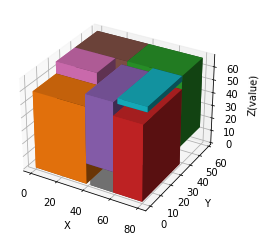

In [39]:

# -*- coding: utf-8 -*-
# @Author: tobby

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
cartonnum=10;
# %matplotlib inline

class Cartons:

    def __init__(self, x, y, z, length, width, height, xl, zl, zh, yw):
        self.x = x
        self.y = y
        self.z = z
        self.length = length
        self.width = width
        self.height = height
        self.xl = xl
        self.zl = zl
        self.zh = zh
        self.yw = yw



    def ifxl(self):
        return bool(self.xl)

    def ifzl(self):
        return bool(self.zl)

    def ifzh(self):
        return bool(self.zh)

    def ifyw(self):
        return bool(self.yw)

a=[
 [0	,	22	,	0	,	36	,	36	,	36	,	0	,	0	,	0	,	0],
 [0	,	0	,	0	,	59	,	39	,	20	,	0	,	1	,	0	,	0],
 [40	,	37	,	14	,	54	,	40	,	21	,	0	,	1	,	0	,	0],
 [59	,	0	,	0	,	58	,	37	,	21	,	0	,	1	,	0	,	1],
 [39	,	0	,	16	,	52	,	33	,	20	,	0	,	1	,	0	,	1],
 [0	,	37	,	37	,	40	,	31	,	21	,	1	,	0	,	0	,	0],
 [0	,	20	,	37	,	31	,	31	,	17	,	1	,	0	,	0	,	0],
 [42	,	0	,	0	,	31	,	17	,	16	,	0	,	0	,	1	,	0],
[36	,	32	,	0	,	26	,	23	,	14	,	0	,	0	,	1	,	0],
 [59	,	4	,	64	,	33	,	21	,	4	,	0	,	0	,	1	,	0]
# [27	,	0	,	17	,	61	,	47	,	32	,	0	,	1	,	0	,	0],
# [0	,	3	,	0	,	54	,	40	,	21	,	0	,	0	,	0	,	0],
# [21	,	36	,	0	,	54	,	40	,	21	,	1	,	0	,	0	,	0],
# [47	,	36	,	40	,	40	,	31	,	21	,	0	,	1	,	0	,	0],
# [0	,	36	,	49	,	40	,	31	,	21	,	1	,	0	,	0	,	0],
# [0	,	0	,	40	,	40	,	31	,	21	,	0	,	1	,	0	,	1],
# [47	,	5	,	0	,	31	,	31	,	17	,	0	,	0	,	1	,	0],
# [74	,	0	,	59	,	33	,	21	,	4	,	0	,	0	,	0	,	0]
]

carton = [Cartons(a[i][0],a[i][1],a[i][2],a[i][3],a[i][4],a[i][5],a[i][6],a[i][7],a[i][8],a[i][9]) for i in range(cartonnum)]

if __name__ == "__main__":
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
for i in range(0,cartonnum):
    x=carton[i].x
    y=carton[i].y
    z=carton[i].z
    if  carton[i].ifyw() and  carton[i].ifzl() :#高 宽 长
        dx=carton[i].height
        dy=carton[i].width
        dz=carton[i].length


    elif(not carton[i].ifyw() )and (carton[i].ifzl()):#宽 高 长

        dx=carton[i].width
        dy=carton[i].height
        dz = carton[i].length
    elif (not carton[i].ifyw()) and (carton[i].ifxl()):#长 高 宽
        dx = carton[i].length
        dy = carton[i].height
        dz = carton[i].width

    elif (not carton[i].ifyw() )and  (carton[i].ifzh() ):#宽 长 高
        dx=carton[i].width
        dy=carton[i].length
        dz=carton[i].height

    elif (not carton[i].ifzh() ) and (not carton[i].ifxl()) and(not carton[i].ifzl()):#高 长 宽
        dx=carton[i].height
        dy=carton[i].length
        dz=carton[i].width
    else:#长 宽 高
        dx = carton[i].length
        dy = carton[i].width
        dz = carton[i].height


    ax.bar3d(x, y, z, dx, dy, dz, shade=True)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z(value)')
#plt.axis('scaled')
plt.savefig('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/11/imgs/pakage.png')
plt.show()




In [40]:

# #在多包裹的情况下，对数据进行清洗和计算。
# #问题三，使用箱子和袋子
# #对数据进行预处理，删除8598个数据中箱子和盒子无法处理的订单。
# import gc
# process_Bag_Box_data = ca_more.copy()
# for i in range(len(ca_more)):
#     if not (check_volume(process_Bag_Box_data[len(ca_more)-1-i][1:4],Bag_size[3]) or(check_volume(process_Bag_Box_data[len(ca_more)-1-i][1:4],Box_size[4]))):
#         process_Bag_Box_data.pop(len(ca_more)-i-1)
# print(len(process_Bag_Box_data))
# import pandas as pd
#
#
# test=pd.DataFrame(columns=None,index=None,data=process_Bag_Box_data)
#
# test.to_csv('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/data/bag_box_virgin.csv',encoding='gbk')
# #放入数据
# head_Bag_Box_new=[y[0] for y in process_Bag_Box_data]
# head_Bag_Box_set = set(head_Bag_Box_new)
# #记录所用箱子
# flag_bag = 0
# name_list = []
# for i in head_Bag_Box_set:
#     print("第%s个订单处理"%i)
#     index = []
#     input = []
#     for j in range(len(process_Bag_Box_data)):
#         if process_Bag_Box_data[j][0] == i:
#             index.append(j)
#     for k in index:
#         input.append(process_Bag_Box_data[k])
#
#     # 将数据导入到数组中
#     print(input)
#     while len(input) !=0:
#         packer_Bag_Box = Packer()
#         for g in range(len(input)):
#             for m in range(input[g][4]):
#                 packer_Bag_Box.add_item(Item('no%s'%g+'.%s'%m,input[g][1],input[g][2],input[g][3],0))
#
#         packer_Bag_Box.add_bin(Bin('Bag1', 179.3421433,119.3421433,71.6578567,10))
#         packer_Bag_Box.add_bin(Bin('Bag2', 210.12536361,150.12536361,90.87463639,8))
#         packer_Bag_Box.add_bin(Bin('Bag3', 280.66217398,220.66217398,120.33782602,15))
#         packer_Bag_Box.add_bin(Bin('Bag4', 305.92446463,245.92446463,145.07553537,23))
#         packer_Bag_Box.add_bin(Bin('1_', 165,120,55,45))
#         packer_Bag_Box.add_bin(Bin('2_', 200,140,70,67))
#         packer_Bag_Box.add_bin(Bin('3_', 200,150,150,103))
#         packer_Bag_Box.add_bin(Bin('4_', 270,200,90,132))
#         packer_Bag_Box.add_bin(Bin('5_', 300,200,170,179))
#         k,name_add = packer_Bag_Box.pack()
#         input = k.copy()
#         del k
#         flag_bag = flag_bag+1
#         name_list.append(name_add)
#
#         del packer_Bag_Box
#         gc.collect()
# print(flag_bag)
#
# import pandas as pd
#
#
# name=['name']
#
# test=pd.DataFrame(columns=name,index=None,data=name_list)
#
# test.to_csv('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/data/bag_box.csv',encoding='gbk')

In [41]:
#在多包裹的情况下，对数据进行清洗和计算。
#问题二，只使用袋子
#对数据进行预处理，删除8598个数据中箱子无法处理的订单。
#ca_more
"""
250	190	1	10
300	250	1	8
400	330	1	15
450	420	1	23
"""
import gc
process_Bag_data = ca_more.copy()
for i in range(len(ca_more)):
    if not check_volume(process_Bag_data[len(ca_more)-1-i][1:4],Bag_size[3]):
        process_Bag_data.pop(len(ca_more)-i-1)
print(len(process_Bag_data))

import pandas as pd


test=pd.DataFrame(columns=None,index=None,data=process_Bag_data)

test.to_csv('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/data/bag_virgin.csv',encoding='gbk')

#放入数据
head_Bag_new=[y[0] for y in process_Bag_data]
head_Bag_set = set(head_Bag_new)
#记录所用箱子
flag_bag = 0
name_list = []
for i in head_Bag_set:
    print("第%s个订单处理"%i)
    index = []
    input = []
    for j in range(len(process_Bag_data)):
        if process_Bag_data[j][0] == i:
            index.append(j)
    for k in index:
        input.append(process_Bag_data[k])

    # 将数据导入到数组中
    print(input)
    while len(input) !=0:
        packer_Bag = Packer()
        for g in range(len(input)):
            for m in range(input[g][4]):
                packer_Bag.add_item(Item('no%s'%g+'.%s'%m,input[g][1],input[g][2],input[g][3],0))


        packer_Bag.add_bin(Bin('Bag1', 179.3421433,119.3421433,71.6578567,10))
        packer_Bag.add_bin(Bin('Bag2', 210.12536361,150.12536361,90.87463639,8))
        packer_Bag.add_bin(Bin('Bag3', 280.66217398,220.66217398,120.33782602,15))
        packer_Bag.add_bin(Bin('Bag4', 305.92446463,245.92446463,145.07553537,23))

        k,name_add = packer_Bag.pack()
        input = k.copy()
        del k
        flag_bag = flag_bag+1
        name_list.append(name_add)

        del packer_Bag
        gc.collect()
print(flag_bag)

import pandas as pd


name=['name']

test=pd.DataFrame(columns=name,index=None,data=name_list)

test.to_csv('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/data/bag.csv',encoding='gbk')

7484
第1个订单处理
[[1, 170, 110, 27, 7], [1, 210, 200, 30, 1]]

::::::::::: Bag1(179.342x119.342x71.658, max_weight:10.000) vol(1533698.536) item_number(2) filling_ratio(0.658)
FITTED ITEMS:
====>  no0.0(170.000x110.000x27.000, weight: 0.000) pos([0, 0, 0]) rt(0) vol(504900.000)
====>  no0.1(170.000x110.000x27.000, weight: 0.000) pos([0, 0, Decimal('27.000')]) rt(0) vol(504900.000)

UNFITTED ITEMS:
====>  no1.0(210.000x200.000x30.000, weight: 0.000) pos([0, 0, 0]) rt(5) vol(1260000.000)
====>  no0.2(170.000x110.000x27.000, weight: 0.000) pos([0, 0, Decimal('54.000')]) rt(5) vol(504900.000)
====>  no0.3(170.000x110.000x27.000, weight: 0.000) pos([0, 0, Decimal('54.000')]) rt(5) vol(504900.000)
====>  no0.4(170.000x110.000x27.000, weight: 0.000) pos([0, 0, Decimal('54.000')]) rt(5) vol(504900.000)
====>  no0.5(170.000x110.000x27.000, weight: 0.000) pos([0, 0, Decimal('54.000')]) rt(5) vol(504900.000)
====>  no0.6(170.000x110.000x27.000, weight: 0.000) pos([0, 0, Decimal('54.000')]) rt(5) vol(

KeyboardInterrupt: 

In [ ]:
#在多包裹的情况下，对数据进行清洗和计算。
#问题一，只使用箱子
#对数据进行预处理，删除8598个数据中箱子无法处理的订单。
#ca_more
import gc
process_Box_data = ca_more.copy()
for i in range(len(ca_more)):
    if not check_volume(process_Box_data[len(ca_more)-1-i][1:4],Box_size[4]):
        process_Box_data.pop(len(ca_more)-i-1)
print(len(process_Box_data))

import pandas as pd

test=pd.DataFrame(columns=None,index=None,data=process_Box_data)

test.to_csv('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/data/box_virgin.csv',encoding='gbk')

#放入数据
head_Box=[y[0] for y in process_Box_data]
head_Box_set = set(head_Box)
#记录所用箱子
flag_box = 0
name_list = []
for i in head_Box_set:
    print("第%s个订单处理"%i)
    index = []
    input = []
    for j in range(len(process_Box_data)):
        if process_Box_data[j][0] == i:
            index.append(j)
    for k in index:
        input.append(process_Box_data[k])

    # 将数据导入到数组中
    print(input)
    while len(input) !=0:
        packer_Box = Packer()
        for g in range(len(input)):
            for m in range(input[g][4]):
                packer_Box.add_item(Item('no%s'%g+'.%s'%m,input[g][1],input[g][2],input[g][3],0))

        packer_Box.add_bin(Bin('1', 165,120,55,45))
        packer_Box.add_bin(Bin('2', 200,140,70,67))
        packer_Box.add_bin(Bin('3', 200,150,150,103))
        packer_Box.add_bin(Bin('4', 270,200,90,132))
        packer_Box.add_bin(Bin('5', 300,200,170,179))
        k,name_add = packer_Box.pack()
        input = k.copy()
        del k
        flag_box = flag_box+1
        name_list.append(name_add)

        del packer_Box
        gc.collect()
print(flag_box)

import pandas as pd


name=['name']

test=pd.DataFrame(columns=name,index=None,data=name_list)

test.to_csv('/Users/shenfeiyang/Documents/GitHub/mathematical-modeling/data/box.csv',encoding='gbk')



